<h1>Importing Libraries<h1>

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium

<h1>Importing Data</h1>

In [3]:

import requests
import io
import pandas as pd  # Make sure to import pandas

URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/Historical_Wildfires.csv"

# Use requests to get the data
response = requests.get(URL)
text = io.StringIO(response.text)  # Convert the response text to a StringIO object

# Read the CSV into a pandas dataframe
df = pd.read_csv(text)
print('Data read into a pandas dataframe!')

Data read into a pandas dataframe!


<h1>Checking data</h1>

In [24]:
#Sample rows

df.head()

,Region,Date,Estimated_fire_area,Mean_estimated_fire_brightness,Mean_estimated_fire_radiative_power,Mean_confidence,Std_confidence,Var_confidence,Count,Replaced,Year,Month
0,NSW,1/4/2005,8.68000,312.266667,42.400000,78.666667,2.886751,8.333333,3,R,2005,1
1,NSW,1/5/2005,16.61125,322.475000,62.362500,85.500000,8.088793,65.428571,8,R,2005,1
2,NSW,1/6/2005,5.52000,325.266667,38.400000,78.333333,3.214550,10.333333,3,R,2005,1
3,NSW,1/7/2005,6.26400,313.870000,33.800000,92.200000,7.529940,56.700000,5,R,2005,1
4,NSW,1/8/2005,5.40000,337.383333,122.533333,91.000000,7.937254,63.000000,3,R,2005,1


In [25]:
#Verify column name

df.columns

Index(['Region', 'Date', 'Estimated_fire_area',
       'Mean_estimated_fire_brightness', 'Mean_estimated_fire_radiative_power',
       'Mean_confidence', 'Std_confidence', 'Var_confidence', 'Count',
       'Replaced', 'Year', 'Month'],
      dtype='object')

In [26]:
#Checking datatype of variables
df.dtypes

Region                                  object
Date                                    object
Estimated_fire_area                    float64
Mean_estimated_fire_brightness         float64
Mean_estimated_fire_radiative_power    float64
Mean_confidence                        float64
Std_confidence                         float64
Var_confidence                         float64
Count                                    int64
Replaced                                object
Year                                     int32
Month                                    int32
dtype: object

In [27]:
#Converting date from object to datatime
import datetime as dt

df['Year'] = pd.to_datetime(df['Date']).dt.year
df['Month'] = pd.to_datetime(df['Date']).dt.month

In [33]:
#Checking datatype again
df.dtypes

Region                                  object
Date                                    object
Estimated_fire_area                    float64
Mean_estimated_fire_brightness         float64
Mean_estimated_fire_radiative_power    float64
Mean_confidence                        float64
Std_confidence                         float64
Var_confidence                         float64
Count                                    int64
Replaced                                object
Year                                     int32
Month                                    int32
dtype: object

<h1>Plotting graph for change in avg estimate fire overtime</h1>

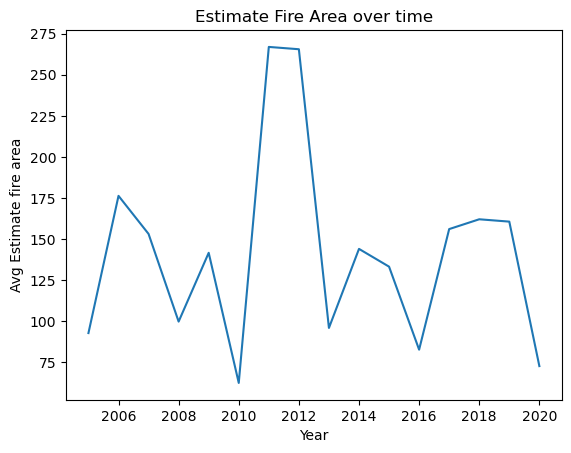

In [40]:
avg_change = df.groupby('Year')['Estimated_fire_area'].mean()

avg_change.plot(x=avg_change.index,y=avg_change.values)

plt.xlabel('Year')
plt.ylabel('Avg Estimate fire area')
plt.title('Estimate Fire Area over time')
plt.show()

<h1>Narrowing graph for time between 2010 to 2013 </h1>

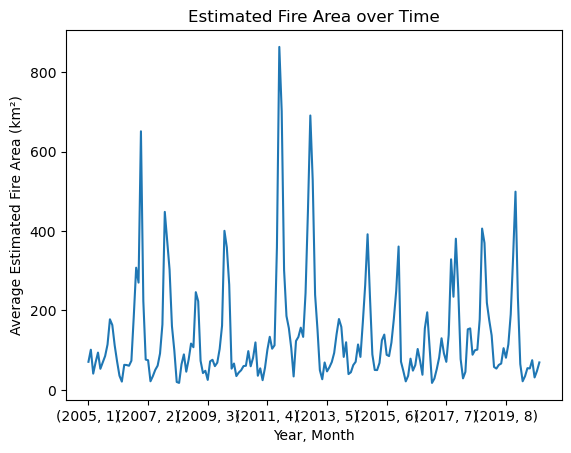

In [41]:
df_new = df.groupby(['Year','Month'])['Estimated_fire_area'].mean()
    # Plotting the data
df_new.plot(x=df_new.index, y=df_new.values)
plt.xlabel('Year, Month')
plt.ylabel('Average Estimated Fire Area (km²)')
plt.title('Estimated Fire Area over Time')
plt.show()

<h1>Graph for mean estimated fire brightness across regions using seaborn with barplot</h1>

In [42]:
df['Region'].unique()

array(['NSW', 'NT', 'QL', 'SA', 'TA', 'VI', 'WA'], dtype=object)

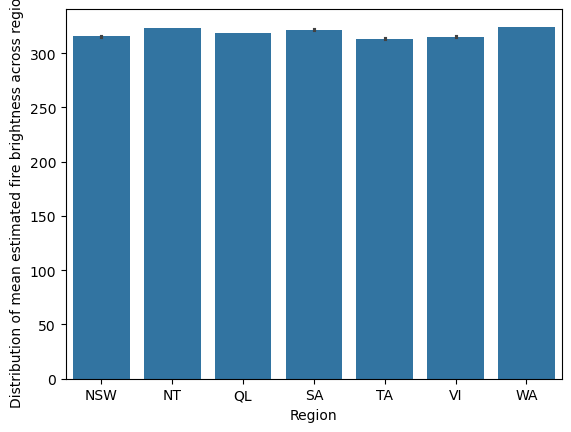

In [43]:
sns.barplot(data =df, x='Region', y='Mean_estimated_fire_brightness')
plt.xlabel('Region')
plt.ylabel('Distribution of mean estimated fire brightness across regions')
plt.show()

<h1>Count for presumed vegetation across regions using piechart</h1>

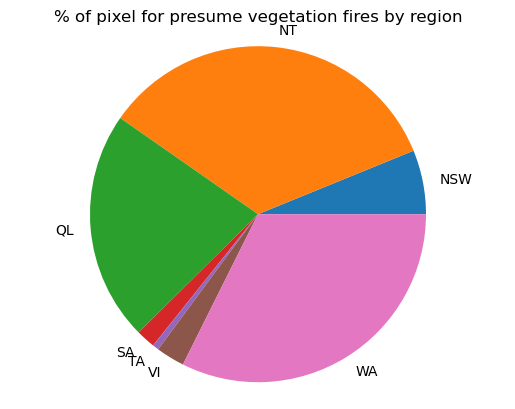

In [44]:
region_counts = df.groupby('Region')['Count'].sum()

plt.pie(region_counts, labels= region_counts.index)
plt.title('% of pixel for presume vegetation fires by region')
plt.axis('equal')
plt.show()

<h1>Adding autcpt function to get % of regions with small fire</h1>

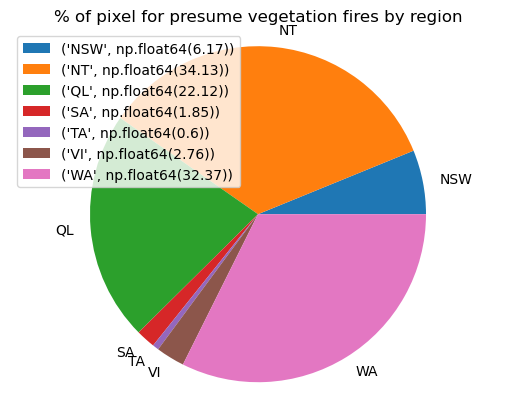

In [48]:
region_counts = df.groupby('Region')['Count'].sum()

plt.pie(region_counts, labels= region_counts.index)
plt.title('% of pixel for presume vegetation fires by region')
plt.legend([(i,round(k/region_counts.sum()*100,2)) for i,k in zip(region_counts.index, region_counts)])
plt.axis('equal')
plt.show()

<h1>Developing Histogram of mean estimate fire beightness with matplotlib</h1>

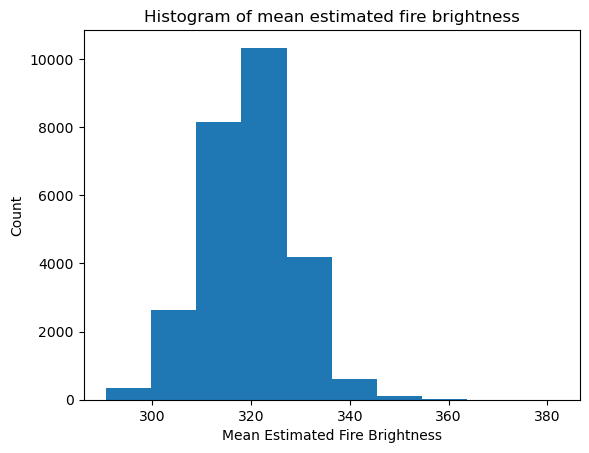

In [46]:

plt.hist(x=df['Mean_estimated_fire_brightness'])
plt.xlabel('Mean Estimated Fire Brightness')
plt.ylabel('Count')
plt.title('Histogram of mean estimated fire brightness')
plt.show()


<h1>Using seaborn to understand fire across regions</h1>

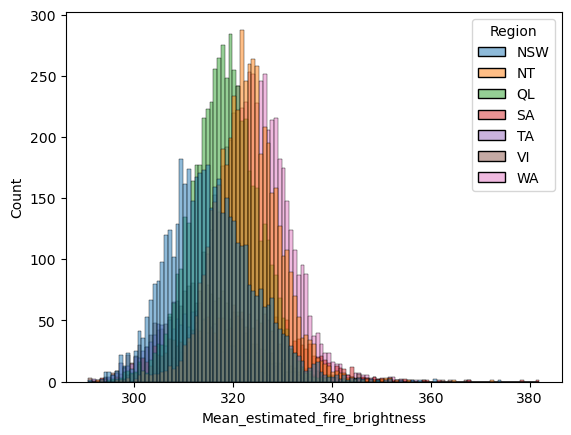

In [17]:
sns.histplot(data=df, x="Mean_estimated_fire_brightness", hue="Region")
plt.show()

<h1>Adding parameteres to see difference in regions</h1>

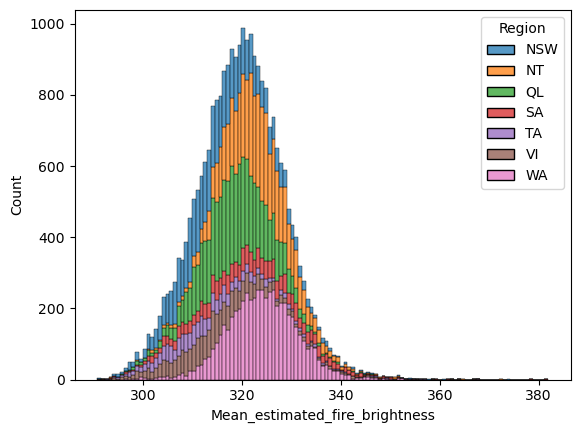

In [49]:
sns.histplot(data=df, x="Mean_estimated_fire_brightness", hue="Region", multiple = "stack")
plt.show()

<h1>Finding if there is any correlation between mean estimated fire radiative power and mean confidence level</h1>

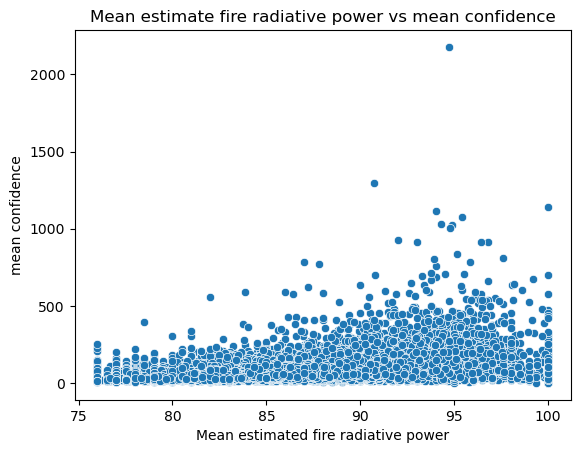

In [51]:
sns.scatterplot(data=df,x='Mean_confidence', y ='Mean_estimated_fire_radiative_power')
plt.xlabel('Mean estimated fire radiative power')
plt.ylabel('mean confidence')
plt.title('Mean estimate fire radiative power vs mean confidence')
plt.show()

<h1>Marking the regions of wildifre using folium</h1>

In [20]:
region_data = {'region':['NSW','QL','SA','TA','VI','WA','NT'], 'Lat':[-31.8759835,-22.1646782,-30.5343665,-42.035067,-36.5986096,-25.2303005,-19.491411], 
               'Lon':[147.2869493,144.5844903,135.6301212,146.6366887,144.6780052,121.0187246,132.550964]}
reg=pd.DataFrame(region_data)
reg

,region,Lat,Lon
0,NSW,-31.875984,147.286949
1,QL,-22.164678,144.584490
2,SA,-30.534367,135.630121
3,TA,-42.035067,146.636689
4,VI,-36.598610,144.678005
5,WA,-25.230300,121.018725
6,NT,-19.491411,132.550964


In [21]:
aus_reg = folium.map.FeatureGroup()

# Create a Folium map centered on Australia
Aus_map = folium.Map(location=[-25, 135], zoom_start=4)

# loop through the region and add to feature group
for lat, lng, lab in zip(reg.Lat, reg.Lon, reg.region):
    aus_reg.add_child(
        folium.features.CircleMarker(
            [lat, lng],
            popup=lab,
            radius=5, # define how big you want the circle markers to be
            color='red',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6
        )
    )

# add incidents to map
Aus_map.add_child(aus_reg)